In [4]:
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import numpy as np

## Area-Weighted Average Function

In [47]:
# Function to calculate area-weighted annual mean temperature for a region
def area_weighted(temp_data,area_data,region):
    # Get area, temperature data for region
    area = area_data.sel(lon=masks[region][0],lat=masks[region][1])
    temp = temp_data.sel(lon=masks[region][0],lat=masks[region][1])
    
    # Calculate area-weighted average
    area_mean = (temp*area).sum(['lon','lat'])/area.sum(['lon','lat'])
    return area_mean

## Load 1950-1959 Data

In [5]:
# Specify root directory, experiment, filename format
rootdir = '/local/ss23/GFDL_LEs/ATM/'
experiment = 'RCP85'
filename = '/t_ref.rcp85.ens*.1950_1959.nc'
paths = rootdir+experiment+filename

# Load data from matching files
data = xr.open_mfdataset(paths,combine='nested',concat_dim='ensemble')

# Calculate ensemble mean
mean_data = data.mean(dim='ensemble')
mean_annual = mean_data['t_ref'].groupby('time.year').mean()

## Load 2090-2100 Data

In [63]:
# Specify root directory, experiment, filename format
rootdir = '/local/ss23/GFDL_LEs/ATM/'
experiment = 'RCP85'
filename = '/t_ref.rcp85.ens*.1950_2100.nc'
paths = rootdir+experiment+filename

# Load data from matching files
data = xr.open_mfdataset(paths,combine='nested',concat_dim='ensemble')

data_short = data.isel(time=slice(-3650,None))

# Calculate ensemble mean
mean_data = data_short.mean(dim='ensemble')
mean_annual = mean_data['t_ref'].groupby('time.year').mean()

## Load 1950-2100 Data

In [ ]:
# Specify root directory, experiment, filename format
rootdir = '/local/ss23/GFDL_LEs/ATM/'
experiment = 'RCP85'
filename = '/t_ref.rcp85.ens*.1950_2100.nc'
paths = rootdir+experiment+filename

# Load data from matching files
data = xr.open_mfdataset(paths,combine='nested',concat_dim='ensemble')

# Calculate ensemble mean
mean_data = data.mean(dim='ensemble')
mean_annual = mean_data['t_ref'].groupby('time.year').mean()

## Regional Masks

In [6]:
# Get longitude and latitude values from data
lon = mean_annual['lon']
lat = mean_annual['lat']

# Dictionary of region masks, represented by lon and lat arrays
masks = {}
masks['Northern North America'] = [lon.where((190<=lon)&(lon<=310),drop=True).values,lat.where((45<=lat)&(lat<=75),drop=True).values]
masks['Central North America'] = [lon.where((230<=lon)&(lon<=310),drop=True).values,lat.where((35<=lat)&(lat<=45),drop=True).values]
masks['South-Central America'] = [lon.where((230<=lon)&(lon<=330),drop=True).values,lat.where((-30<=lat)&(lat<=35),drop=True).values]
masks['Southern South America'] = [lon.where((270<=lon)&(lon<=330),drop=True).values,lat.where((-60<=lat)&(lat<=-30),drop=True).values]
masks['China'] = [lon.where((75<=lon)&(lon<=135),drop=True).values,lat.where((22.5<=lat)&(lat<=50),drop=True).values]
masks['India'] = [lon.where((70<=lon)&(lon<=90),drop=True).values,lat.where((10<=lat)&(lat<=30),drop=True).values]
masks['Oceania'] = [lon.where((100<=lon)&(lon<=165),drop=True).values,lat.where((-45<=lat)&(lat<=10),drop=True).values]
masks['Russia'] = [lon.where((30<=lon)&(lon<=180),drop=True).values,lat.where((50<=lat)&(lat<=75),drop=True).values]
masks['Scandinavia'] = [lon.where((3<=lon)&(lon<=30),drop=True).values,lat.where((55<=lat)&(lat<=70),drop=True).values]
lon_west = lon.where(lon>=345,drop=True)
lon_east = lon.where(lon<=30,drop=True)
lon_eur = xr.concat((lon_west,lon_east),dim='lon').values
masks['Europe'] = [lon_eur,lat.where((35<=lat)&(lat<=55),drop=True)]
lon_west = lon.where(lon>=355,drop=True)
lon_east = lon.where(lon<=10,drop=True)
lon_france = xr.concat((lon_west,lon_east),dim='lon').values
masks['France'] = [lon_france,lat.where((40<=lat)&(lat<=52),drop=True)]

## 1950-1959 Time Series

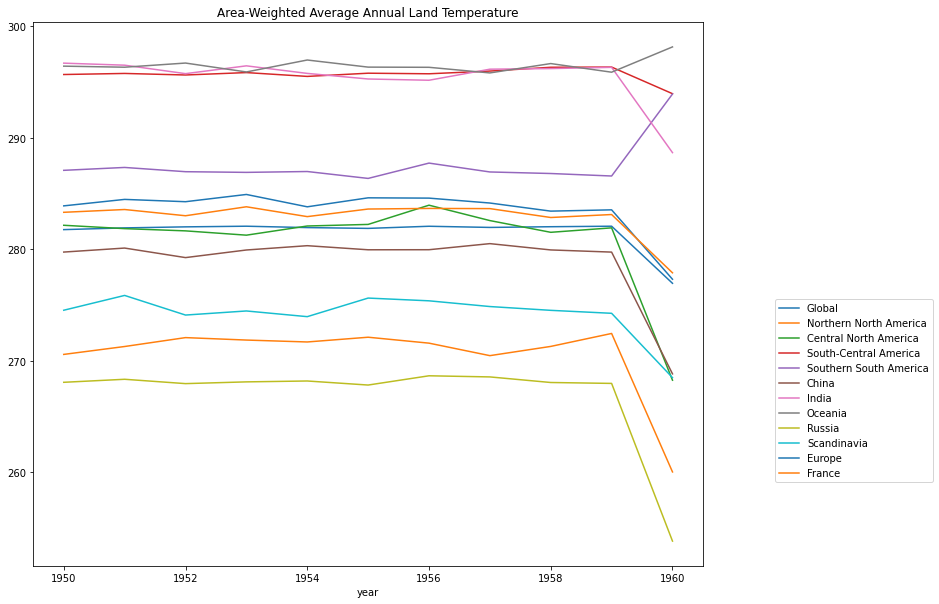

In [61]:
# Load area data
filename_area = 'land_static.nc'
path_area = rootdir+filename_area
land_area = xr.open_dataset(path_area)['land_area']

# Create figure, axes
fig, ax = plt.subplots(figsize=(12,10))

# Calculate global area-weighted average
area_mean = (mean_annual*land_area).sum(['lon','lat'])/land_area.sum(['lon','lat'])
area_mean.plot(ax=ax)

# Plot regions
for region in masks.keys():
    # Calculate area-weighted average temperature
    regional_mean = area_weighted(mean_annual,land_area,region)

    # Plot area-weighted average
    regional_mean.plot(ax=ax)

ax.set_title('Area-Weighted Average Annual Land Temperature')
ax.legend(['Global']+list(masks.keys()),bbox_to_anchor=(1.1,0.5))

## 2090-2100 Time Series

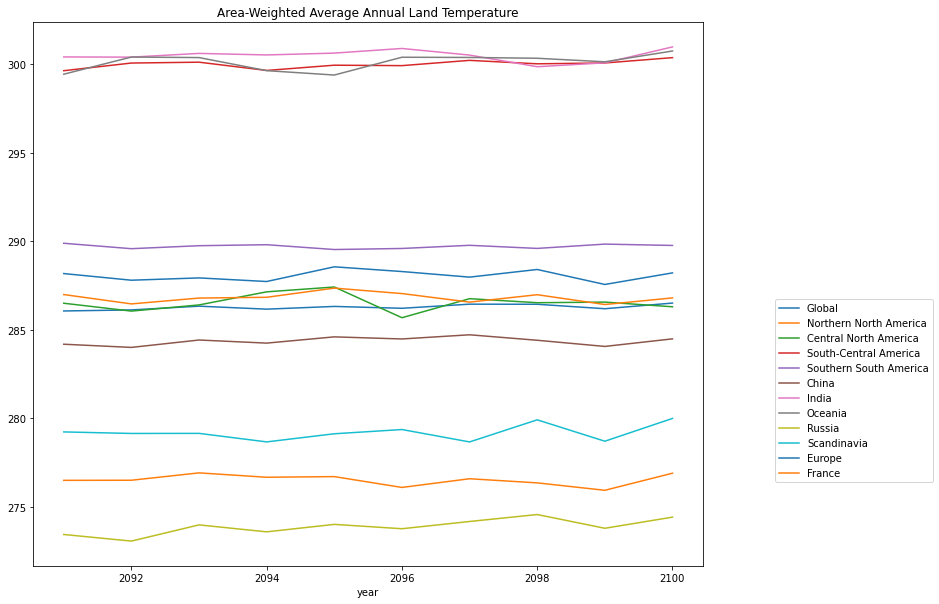

In [65]:
# Load area data
filename_area = 'land_static.nc'
path_area = rootdir+filename_area
land_area = xr.open_dataset(path_area)['land_area']

# Create figure, axes
fig, ax = plt.subplots(figsize=(12,10))

# Calculate global area-weighted average
area_mean = (mean_annual*land_area).sum(['lon','lat'])/land_area.sum(['lon','lat'])
area_mean.plot(ax=ax)

# Plot regions
for region in masks.keys():
    # Calculate area-weighted average temperature
    regional_mean = area_weighted(mean_annual,land_area,region)

    # Plot area-weighted average
    regional_mean.plot(ax=ax)

ax.set_title('Area-Weighted Average Annual Land Temperature')
ax.legend(['Global']+list(masks.keys()),bbox_to_anchor=(1.1,0.5))

## 1950-2100 Time Series

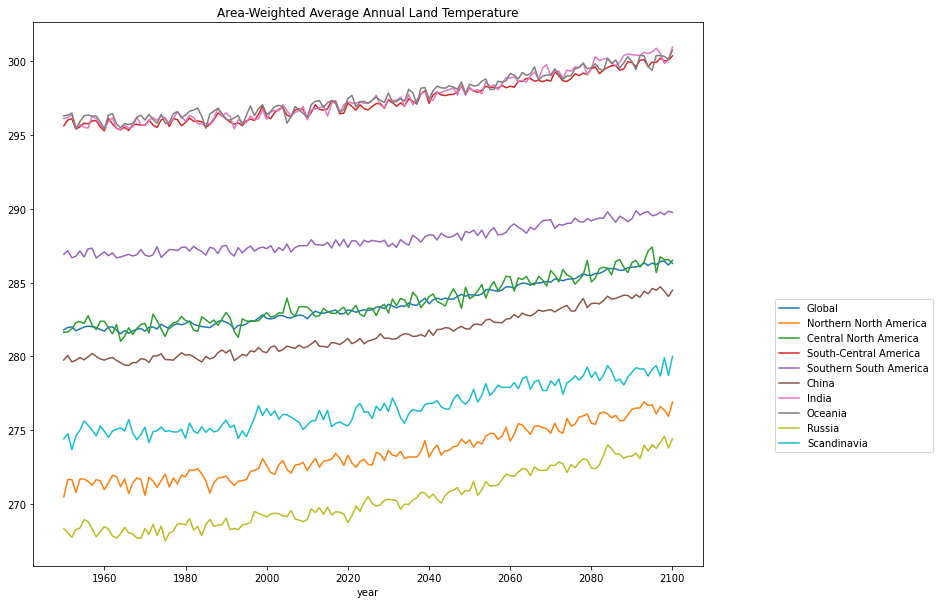

In [93]:
# Load area data
filename_area = 'land_static.nc'
path_area = rootdir+filename_area
land_area = xr.open_dataset(path_area)['land_area']

# Create figure, axes
fig, ax = plt.subplots(figsize=(12,10))

# Calculate global area-weighted average
area_mean = (mean_annual*land_area).sum(['lon','lat'])/land_area.sum(['lon','lat'])
area_mean.plot(ax=ax)

# Plot regions
for region in masks.keys():
    # Calculate area-weighted average temperature
    regional_mean = area_weighted(mean_annual,land_area,region)

    # Plot area-weighted average
    regional_mean.plot(ax=ax)

ax.set_title('Area-Weighted Average Annual Land Temperature')
ax.legend(['Global']+list(masks.keys()),bbox_to_anchor=(1.1,0.5))

## Mapping Regions

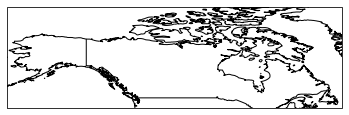

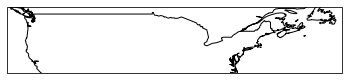

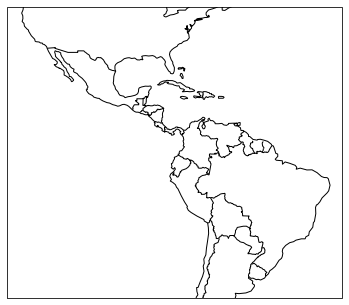

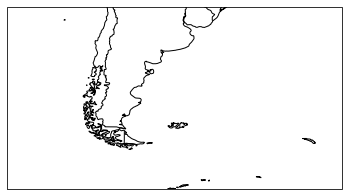

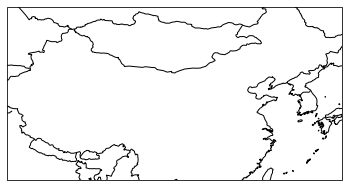

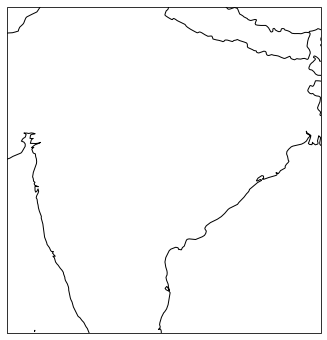

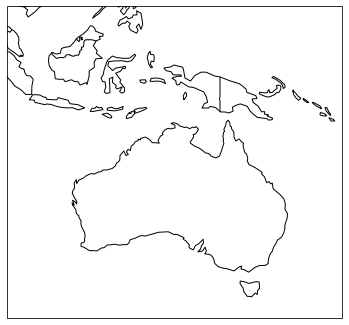

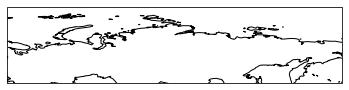

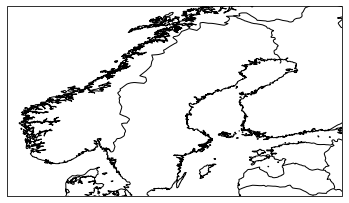

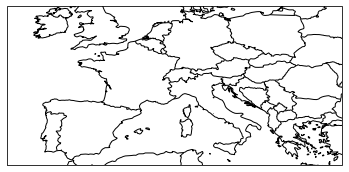

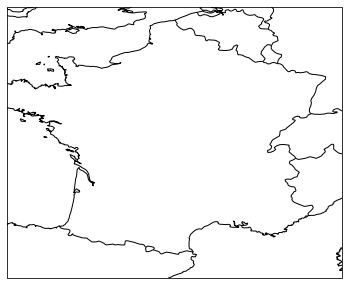

In [9]:
# Check what region corresponds to each mask
for region in masks.keys():
    # Specify projection
    crs = ccrs.PlateCarree()
    
    fig, ax = plt.subplots(figsize=(6,6),subplot_kw={'projection':crs})
    
    # Get longitude and latitude bounds for mask
    ax.set_extent([masks[region][0][0],masks[region][0][-1],masks[region][1][0],masks[region][1][-1]])
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS.with_scale('50m'))